<a href="https://colab.research.google.com/github/seshiu/pubchem_rdkit/blob/main/PubChem_properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ライブラリのインストール

In [ ]:
!pip install altair_viewer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 844.5/844.5 kB 10.0 MB/s eta 0:00:00


In [ ]:
!pip install pubchempy
!pip install rdkit
!pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=2a71189d31ed36e2655ebda1601db47fa20572b45b45d17b28a5f16fd1a36922
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 33.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.7/152.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
import requests
import bs4
from bs4 import BeautifulSoup
import re
from statistics import mode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# import altair as alt
# alt.renderers.enable('altair_viewer')

In [ ]:
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

#CIDのリストから類似の化合物のCIDリストを出す

以下に気になる化合物のCIDリストを記入

In [ ]:
CID_list0 = [517637, 12827211]

In [ ]:
#CIDのリストから類似の化合物リストをつくる関数、listkey_count：1化合物に対し、何個の類似物をもってくるか
def get_similar(CID_list, listkey_count=1):

    similar_CID_list = []
    
    for CID in CID_list:
        matches = pcp.get_compounds(CID, 'cid')
        if matches:
            best_match = matches[0]
            similar_compounds = pcp.get_compounds(best_match.isomeric_smiles, 'smiles', searchtype='similarity',listkey_count=listkey_count)

            for c in similar_compounds:
                #print(c.cid)
                similar_CID_list.append(c.cid)

    return similar_CID_list

In [ ]:
CID_similar_list = get_similar(CID_list0)

元々のリストに類似の化合物を加えたリストを作成

In [ ]:
temp = CID_list0 + CID_similar_list

CID_list = sorted(set(temp),key=temp.index)
CID_list

[517637,
 12827211,
 32881,
 101560,
 5541,
 8098,
 8836,
 60196418,
 24752,
 110973,
 94210,
 23497921,
 8830,
 8923,
 5223212,
 2345,
 32611,
 31288,
 28999,
 15260,
 8177,
 14402222]

# CIDのリストがあったときに、Computed PropertiesとExperimental Propertiesを取得

CIDリストからComputer Properties

In [ ]:
def cid_to_comp_properties(CID_list,properties_list, listkey_count=10):

    df_properties_all = pd.DataFrame(columns=properties_list)

    for CID in CID_list:

      df_properties = pcp.get_properties(properties_list, CID, 'cid', as_dataframe=True)

      df_properties_all = pd.concat([df_properties_all,df_properties])

    return df_properties_all



In [ ]:
df_comp_properties = cid_to_comp_properties(CID_list, ['MolecularFormula','IUPACName','CanonicalSMILES','MolecularWeight', 'XLogP', 'TPSA','Complexity', 'Charge', 'HBondDonorCount', 'HBondAcceptorCount'])
df_comp_properties

,MolecularFormula,IUPACName,CanonicalSMILES,MolecularWeight,XLogP,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount
517637,C17H16O4,2-benzoyloxypropyl benzoate,CC(COC(=O)C1=CC=CC=C1)OC(=O)C2=CC=CC=C2,284.31,3.8,52.6,341,0,0,4
12827211,C21H44O8,2-[2-[2-[2-[2-[2-(2-hydroxypropoxy)propoxy]pro...,CC(CO)OCC(C)OCC(C)OCC(C)OCC(C)OCC(C)OCC(C)O,424.6,0.8,95.8,371,0,2,8
32881,C6H14O3,2-(2-hydroxypropoxy)propan-1-ol,CC(CO)OCC(C)O,134.17,-0.7,49.7,65,0,2,3
101560,C20H22O5,1-(2-benzoyloxypropoxy)propan-2-yl benzoate,CC(COCC(C)OC(=O)C1=CC=CC=C1)OC(=O)C2=CC=CC=C2,342.4,4.0,61.8,372,0,0,5
5541,C9H14O6,"2,3-diacetyloxypropyl acetate",CC(=O)OCC(COC(=O)C)OC(=O)C,218.20,0.2,78.9,229,0,0,6
8098,C10H18O6,2-[2-(2-acetyloxyethoxy)ethoxy]ethyl acetate,CC(=O)OCCOCCOCCOC(=O)C,234.25,-0.3,71.1,182,0,0,6
8836,C22H42O8,bis[2-(2-butoxyethoxy)ethyl] hexanedioate,CCCCOCCOCCOC(=O)CCCCC(=O)OCCOCCOCCCC,434.6,2.5,89.5,353,0,0,8
60196418,C13H28O4,1-[2-(1-butoxypropoxy)propoxy]propan-1-ol,CCCCOC(CC)OC(C)COC(CC)O,248.36,2.9,47.9,164,0,1,4
24752,C10H22O3,1-(1-butoxypropan-2-yloxy)propan-2-ol,CCCCOCC(C)OCC(C)O,190.28,1.4,38.7,106,0,1,3
110973,C27H50O6,"2,3-bis(2-ethylhexanoyloxy)propyl 2-ethylhexan...",CCCCC(CC)C(=O)OCC(COC(=O)C(CC)CCCC)OC(=O)C(CC)...,470.7,8.5,78.9,501,0,0,6


CIDリストからExperimental Properties

物性の例：'Melting+Point','Refractive+Index','Density','LogP', 'Boiling+:Point'

In [ ]:
def cid_to_exp_properties(CID_list, property_heading_list):

  df_properties = pd.DataFrame(index = CID_list, columns = property_heading_list)

  for i in range(len(property_heading_list)):

    property_heading = property_heading_list[i]

    print(property_heading)

    for CID in CID_list:
      data = requests.get(f"https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/{CID}/xml?heading={property_heading}")
      html = BeautifulSoup(data.content, "xml")
      if len(html.find_all('String')) > 0:
        print(mode(html.find_all('String')).text)
        df_properties.loc[CID,property_heading] = mode(html.find_all('String')).text
      else:
        df_properties.loc[CID,property_heading] = np.nan

  return df_properties


In [ ]:
df_exp_properties = cid_to_exp_properties(CID_list, ['Melting+Point','Boiling+:Point','Refractive+Index','Density','LogP'])
df_exp_properties

Melting+Point
-3 °C
-58 °F (USCG, 1999)
-78 °C
-58 °F (NTP, 1992)
-47 °C
None; turns to glass at -43 °C
-29.0 °C
Freezing point: -35.2 °C
21 °C
-49 °F (USCG, 1999)
-32 °C
-90.6 °F (NTP, 1992)
Boiling+:Point
232.00 °C. @ 12.00 mm Hg
258-259 °C
572 °F at 760 mmHg (NTP, 1992)
240 °C @ 5 mm Hg
>200 °C
274.5 °C
278 °C
321.3 °C
271 °C
475 °F at 760 mmHg (USCG, 1999)
448 °F at 760 mmHg (NTP, 1992)
Refractive+Index
1.542-1.547
/PPG 400/ Specific gravity: 1.007 at 25 °C; Pour point: -49 °C; Index of refraction: 1.445 at 25 °C
[n]D/25 between 1,429 and 1,431
INDEX OF REFRACTION: 1.437 AT 25 °C
Index of refraction: 1.4400 at 20 °C/D
Index of refraction: 1.4299 @ 20 °C/D
Index of refraction =  1.4389 at 20 °C/D
Index of refraction: 1.5680 at 20 °C/D
INDEX OF REFRACTION: 1.4449 @ 20 °C/D
Index of refraction: 1.4262 at 20 °C/D
Index of refraction: 1.4258 at 27 °C/D
Density
1.157-1.163
1.012 at 68 °F (USCG, 1999)
1.1583 g/cu cm at 20 °C
1.1173 at 68 °F (NTP, 1992)
0.973-0.990
0.9768 @ 20 °C/4 °C
0.98

,Melting+Point,Boiling+:Point,Refractive+Index,Density,LogP
517637,-3 °C,232.00 °C. @ 12.00 mm Hg,1.542-1.547,1.157-1.163,4.257 (est)
12827211,NaN,NaN,NaN,NaN,NaN
32881,"-58 °F (USCG, 1999)",NaN,/PPG 400/ Specific gravity: 1.007 at 25 °C; Po...,"1.012 at 68 °F (USCG, 1999)",NaN
101560,NaN,NaN,NaN,NaN,NaN
5541,-78 °C,258-259 °C,"[n]D/25 between 1,429 and 1,431",1.1583 g/cu cm at 20 °C,log Kow = 0.25
8098,"-58 °F (NTP, 1992)","572 °F at 760 mmHg (NTP, 1992)",INDEX OF REFRACTION: 1.437 AT 25 °C,"1.1173 at 68 °F (NTP, 1992)",NaN
8836,-47 °C,240 °C @ 5 mm Hg,NaN,NaN,NaN
60196418,NaN,NaN,NaN,NaN,NaN
24752,None; turns to glass at -43 °C,>200 °C,Index of refraction: 1.4400 at 20 °C/D,0.973-0.990,1.5
110973,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_properties_pubchem = pd.concat([df_comp_properties,df_exp_properties],axis=1)

# rdkit記述子計算

In [ ]:
def cal_desc_from_smiles(df, smiles_column):

  smiles_series = df[smiles_column]

  # 計算する記述子名の取得
  descriptor_names = []
  for descriptor_information in Descriptors.descList:
      descriptor_names.append(descriptor_information[0])

  # 記述子の計算
  descriptor_calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
  descriptors = []  # ここに計算された記述子の値を追加
  #print('分子の数 :', len(smiles))
  for index, smiles_i in enumerate(smiles_series):
      #print(index + 1, '/', len(smiles))
      molecule = Chem.MolFromSmiles(smiles_i)
      descriptors.append(descriptor_calculator.CalcDescriptors(molecule))
  descriptors = pd.DataFrame(descriptors, index=df.index, columns=descriptor_names)

  return descriptors

In [ ]:
df_rdkit_desc = cal_desc_from_smiles(df_properties_pubchem, 'CanonicalSMILES')
df_rdkit_desc

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
517637,11.807049,11.807049,0.020140,-0.508918,0.791677,284.311,268.183,284.104859,108,0,...,0,0,0,0,0,0,0,0,0,0
12827211,9.208004,9.208004,0.003546,-0.473747,0.324029,424.575,380.223,424.303618,176,0,...,0,0,0,0,0,0,0,0,0,0
32881,8.690139,8.690139,0.006667,-0.445370,0.557820,134.175,120.063,134.094294,56,0,...,0,0,0,0,0,0,0,0,0,0
101560,11.907354,11.907354,0.227977,-0.398397,0.687286,342.391,320.215,342.146724,132,0,...,0,0,0,0,0,0,0,0,0,0
5541,10.640326,10.640326,0.122824,-0.754352,0.478698,218.205,204.093,218.079038,86,0,...,0,0,0,0,0,0,0,0,0,0
8098,10.361971,10.361971,0.252759,-0.318304,0.417400,234.248,216.104,234.110338,94,0,...,0,0,0,0,0,0,0,0,7,0
8836,11.604806,11.604806,0.235594,-0.277112,0.178742,434.570,392.234,434.287968,178,0,...,0,0,0,0,0,0,0,0,15,0
60196418,9.262436,9.262436,0.066874,-0.692466,0.450943,248.363,220.139,248.198759,104,0,...,0,0,0,0,0,0,0,0,1,0
24752,8.945085,8.945085,0.075422,-0.390656,0.590656,190.283,168.107,190.156895,80,0,...,0,0,0,0,0,0,0,0,2,0
110973,12.739510,12.739510,0.086863,-0.783853,0.146646,470.691,420.291,470.360739,194,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_rdkit_desc['flag'] = 0
df_rdkit_desc.loc[CID_list0,'flag'] = 1
df_rdkit_desc

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,flag
517637,11.807049,11.807049,0.020140,-0.508918,0.791677,284.311,268.183,284.104859,108,0,...,0,0,0,0,0,0,0,0,0,1
12827211,9.208004,9.208004,0.003546,-0.473747,0.324029,424.575,380.223,424.303618,176,0,...,0,0,0,0,0,0,0,0,0,1
32881,8.690139,8.690139,0.006667,-0.445370,0.557820,134.175,120.063,134.094294,56,0,...,0,0,0,0,0,0,0,0,0,1
101560,11.907354,11.907354,0.227977,-0.398397,0.687286,342.391,320.215,342.146724,132,0,...,0,0,0,0,0,0,0,0,0,1
5541,10.640326,10.640326,0.122824,-0.754352,0.478698,218.205,204.093,218.079038,86,0,...,0,0,0,0,0,0,0,0,0,1
8098,10.361971,10.361971,0.252759,-0.318304,0.417400,234.248,216.104,234.110338,94,0,...,0,0,0,0,0,0,0,7,0,1
8836,11.604806,11.604806,0.235594,-0.277112,0.178742,434.570,392.234,434.287968,178,0,...,0,0,0,0,0,0,0,15,0,1
60196418,9.262436,9.262436,0.066874,-0.692466,0.450943,248.363,220.139,248.198759,104,0,...,0,0,0,0,0,0,0,1,0,1
24752,8.945085,8.945085,0.075422,-0.390656,0.590656,190.283,168.107,190.156895,80,0,...,0,0,0,0,0,0,0,2,0,1
110973,12.739510,12.739510,0.086863,-0.783853,0.146646,470.691,420.291,470.360739,194,0,...,0,0,0,0,0,0,0,0,0,1


# 結合

In [ ]:
from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(df_comp_properties, "CanonicalSMILES")

In [ ]:
selected_CID = CID_list0 + list(df_exp_properties.drop(index=CID_list0).dropna(how='all').index)
selected_rdkit_desc = ['MolLogP','MolMR','FractionCSP3']

df = pd.concat([df_comp_properties.loc[selected_CID,:], df_exp_properties.loc[selected_CID,:],
                df_rdkit_desc.loc[selected_CID,selected_rdkit_desc]],axis=1)

df.insert(0,'cid',df.index)

# 出力

ファイル名

In [ ]:
output_file_name = 'sample2.xlsx'

In [ ]:
PandasTools.SaveXlsxFromFrame(df, output_file_name, molCol='ROMol', size=(100,100))

# PCA


In [ ]:
def tsne(data, columns, perplexity=5):
    
    X = data[columns]

    #全て同じ値の記述子は削除
    X = X.loc[:,~(X.nunique()==1)]
   
    autoscaled_X = (X - X.mean(axis=0)) / X.std(axis=0, ddof=1)
    X_tsne = TSNE(perplexity=perplexity, n_components=2, init='pca',
             random_state=10).fit_transform(autoscaled_X)
    
    X_tsne = pd.DataFrame(X_tsne, index=X.index, columns=['pca1','pca2'])


    plt.scatter(X_tsne['pca1'],X_tsne['pca2'], c=data['flag'])
    plt.show()

    #print(X_tsne)

    # var1 = X_tsne.columns[0]
    # var2 = X_tsne.columns[1]
    # size = 10

    #tooltip_list =  sorted(list(set(Z.columns[:10]) - set(var1 + var2)))
    #chart = alt.Chart(X_tsne,height=500).mark_circle(size=200).encode(x='pca1', y='pca2', color = color).configure_axis(labelFontSize=16,titleFontSize=20)
    #chart = alt.Chart(X_tsne).mark_circle().encode(x='pca1', y='pca2')


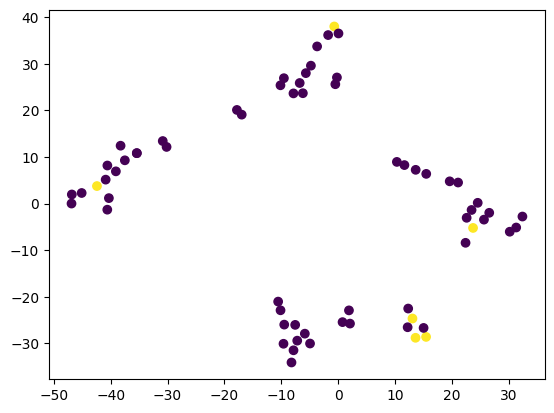

In [ ]:
tsne(df_rdkit_desc,df_rdkit_desc.columns[:-1])

In [ ]:
df_exp_properties.dropna(how='all')

,Melting_Point,Refractive_Index,Density,LogP
517637,-3 °C,1.542-1.547,1.157-1.163,4.257 (est)
7641,-67.8 °C,Index of refraction: 1.4474 @ 20 °C/D,"0.923 (USCG, 1999)",7.771 (est)
5541,-78 °C,"[n]D/25 between 1,429 and 1,431",1.1583 g/cu cm at 20 °C,log Kow = 0.25
2345,21 °C,Index of refraction: 1.5680 at 20 °C/D,1.1121 g/cu cm at 25 °C,log Kow = 3.97
23235,NaN,1.490-1.500,"0.979 at 70.7 °F (NTP, 1992)",4.672 (est)
8698,-22 °C,INDEX OF REFRACTION: 1.4940 @ 25 °C/D,1.00 @ 20 °C,NaN
21265,NaN,1.514-1.521,1.016-1.025,NaN
13654,NaN,1.492-1.497,1.005-1.011,3.18
8437,-28 °C,Refractive index = 1.5424,1.2 @ 68 °F (20 °C),NaN
7194,NaN,NaN,NaN,4.01
